In [95]:
import pandas as pd
from glob import glob
from json import load
from dask.utils import format_bytes

df = pd.DataFrame()

for path in glob("packed/rows_*"):
    with open(path, "r") as f:
        d = load(f)
    for time in d["times"]:
        new_d = dict(d, wall_clock=time["wall_clock"], throughput=time["throughput"], packed=True)
        del new_d["times"], new_d["bandwidths"]
        df = df.append(new_d, ignore_index=True)

for path in glob("unpacked/rows_*"):
    with open(path, "r") as f:
        d = load(f)
    for time in d["times"]:
        new_d = dict(d, wall_clock=time["wall_clock"], throughput=time["throughput"], packed=False)
        del new_d["times"], new_d["bandwidths"]
        df = df.append(new_d, ignore_index=True)

df = df.fillna(34089205760).groupby(["rows_per_chunk", "device_memory_limit", "packed"], as_index=False).mean()
# df["device_memory_limit"] = df["device_memory_limit"].apply(format_bytes)
df["packed"] = df["packed"].astype(bool)

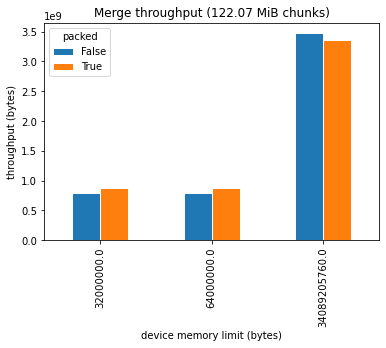

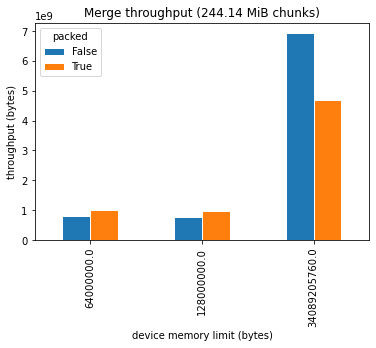

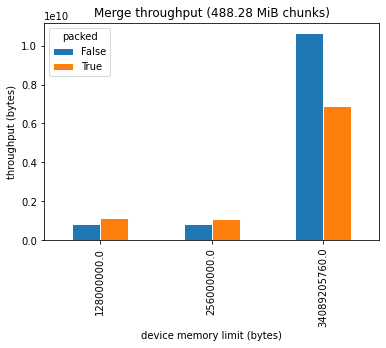

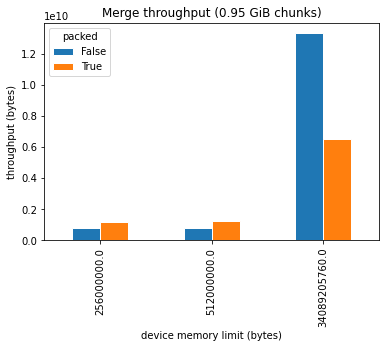

In [111]:
import numpy as np

for i in [0, 6, 12, 18]:
    fig = df.iloc[i:i+6].pivot(index="device_memory_limit", columns="packed", values="throughput").plot.bar(
        title="Merge throughput (%s chunks)" % format_bytes(df.iloc[i:i+6]["rows_per_chunk"][i] * 32),
        xlabel="device memory limit (bytes)",
        ylabel="throughput (bytes)",
        edgecolor="white"
    ).get_figure()

    fig.savefig("output.pdf", transparent=False, bbox_inches='tight', pad_inches=0)

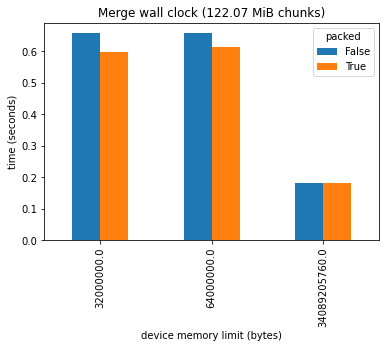

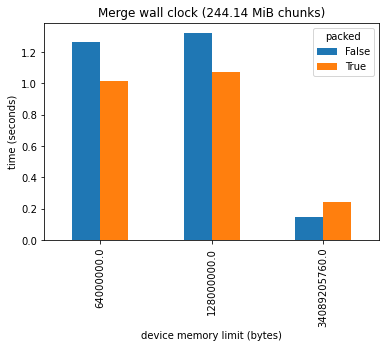

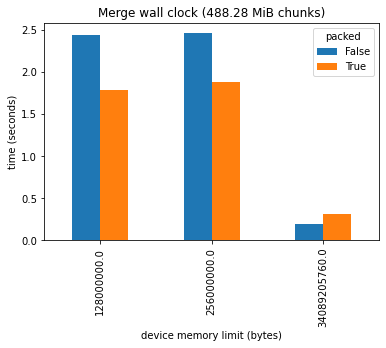

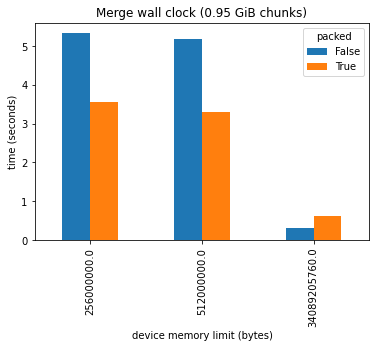

In [104]:
for i in [0, 6, 12, 18]:
    df.iloc[i:i+6].pivot(index="device_memory_limit", columns="packed", values="wall_clock").plot.bar(
        title="Merge wall clock (%s chunks)" % format_bytes(df.iloc[i:i+6]["rows_per_chunk"][i] * 32),
        xlabel="device memory limit (bytes)",
        ylabel="time (seconds)"
    )

In [88]:
df.iloc[0:6]["device_memory_limit"].unique()

array([3.20000000e+07, 6.40000000e+07, 3.40892058e+10])